In [1]:
'''
MACHINE LEARNING WITH KNN
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read in the iris data
data = pd.read_csv('../data/iris.csv')

In [3]:
# create X (features) and y (response)
# the .drop method removes a specific column
X, y = data.drop('species', axis = 1), data['species'] #recall axis 1 means columns
# So I am dropping the "Species" column
print X.shape
print y.shape

(150, 4)
(150,)


In [4]:
# predict y with KNN
from sklearn.neighbors import KNeighborsClassifier  # import class
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)           # instantiate the estimator

In [6]:
knn.fit(X, y)                                       # fit with data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [7]:
# use the models .score method to get accuracy (later classes we will see alternate metrics)
knn.score(X, y)

1.0

In [8]:
# predict a new data point
np.array([6.3,3.1,5.1,2.4]).reshape(1, 4) # turn a single new data point into a matrix

array([[ 6.3,  3.1,  5.1,  2.4]])

In [9]:
knn.predict(np.array([6.3,3.1,5.1,2.4]).reshape(1, 4))                           # predict for a new observation

array(['Iris-virginica'], dtype=object)

In [10]:
# predict for multiple observations at once
X_new = [[6.3,3.1,5.1,2.4], [3, 5, 2, 2]]
knn.predict(X_new)

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

In [11]:
# try a different value of K
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print knn.predict(X_new)              # predictions
print knn.predict_proba(X_new)        # predicted probabilities

['Iris-virginica' 'Iris-setosa']
[[ 0.  0.  1.]
 [ 1.  0.  0.]]


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


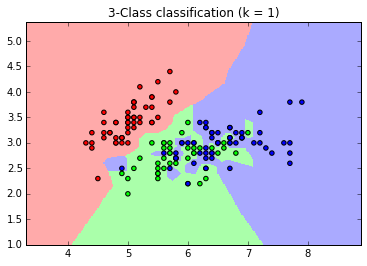

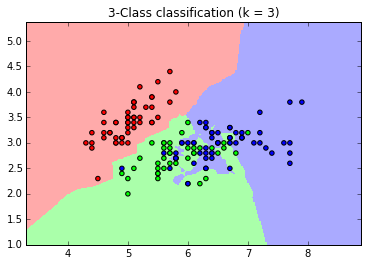

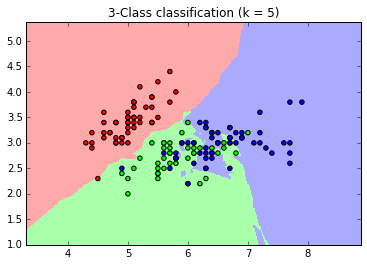

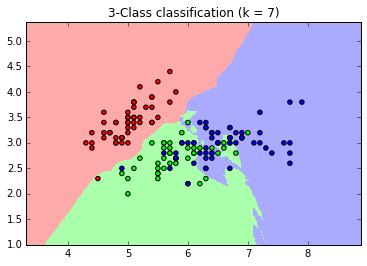

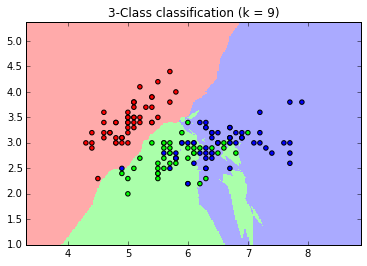

In [12]:
# plot the decision boundaries of the model
# Notice that as we increase K, the number 
# of small isolated "prediction islands" goes down

import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

for n_neighbors in range(1,10, 2):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    iris = load_iris()
    X_only_2 = iris.data[:, :2]  # we only take the first two features for ease
    y_only_2 = iris.target
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_only_2, y_only_2)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_only_2[:, 0].min() - 1, X_only_2[:, 0].max() + 1
    y_min, y_max = X_only_2[:, 1].min() - 1, X_only_2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_only_2[:, 0], X_only_2[:, 1], c=y_only_2, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))

plt.show()

In [13]:
# compute the accuracy for K=5
# K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
# the score function will return the accuracy of your prediction
# the number of correct prepdictions / the number of rows
knn.score(X, y)

0.96666666666666667

In [ ]:
# remember supervised learning is not ONLY about prediction but about finding relationships between variables

In [14]:
# for each column, use only that column to try and predict class
# This is called iterative feature selection

for column in X.columns:
    X_subset = X[[column]]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_subset, y)
    print column, knn.score(X_subset, y)

sepal_length 0.76
sepal_width 0.533333333333
petal_length 0.953333333333
petal_width 0.96


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['sepal_length', 'sepal_width']] # using only sepal measurements
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.85333333333333339

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['petal_length', 'petal_width']] # using only petal measurements
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.97999999999999998

In [ ]:
# It seems as though the petal measurements 
# are MORE important than sepal measurements
# That does not mean that the sepal
# measurements are UNimportant

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) # using ALL features
# IN this case, it does seem to take away from the overall predicting power...
knn.score(X, y)

0.95999999999999996

In [ ]:
# When to scale data
# You should normalize (scale) data when the scale of a column feature is 
# either irrelevant and/or misleading. 
# You should NOT normalize when the scale is meaningful.

# KNN uses the Euclidean distance and considers it meaningful. 
# scaling our data is likely important..

In [23]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

# standard scalr can only take in numpy arrays, no dataframes
X_scaled = s.fit_transform(X[['petal_length', 'petal_width']].as_matrix())

In [25]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['petal_length', 'petal_width']]
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.97999999999999998

In [24]:
# scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

0.97999999999999998

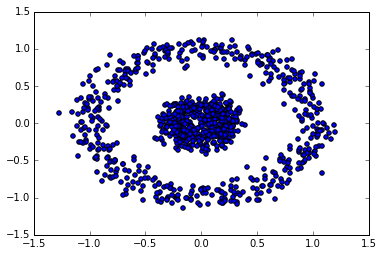

In [26]:
# KNN is a discriminative, non-parametric model

# discriminative: It attempts to model the conditional 
# probability between the response and the features


# non-parametric: KNN model makes no assumptions 
# about the shape of the underlying data, it is able to model
# data in funky shapes

# Wednesday's model will not be so lucky on this dataset...

from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

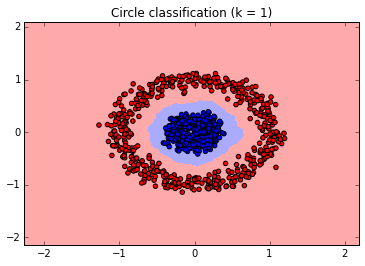

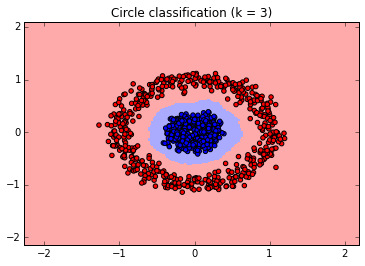

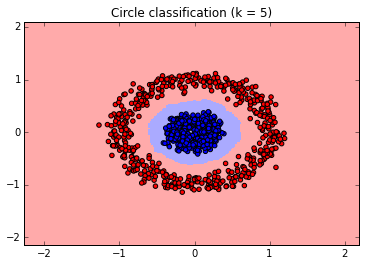

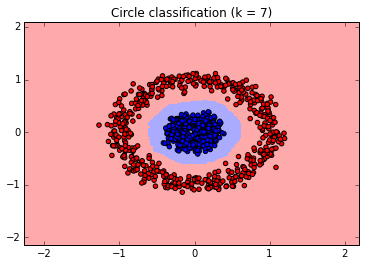

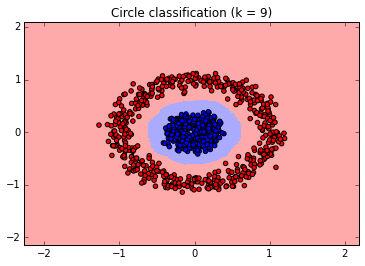

In [27]:
for n_neighbors in range(1,10, 2):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(circles_X, circles_y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
    y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Circle classification (k = %i)"
              % (n_neighbors))

plt.show()

In [28]:
# Let's graph the accuracy of a few values of K
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[1.0,
 0.97999999999999998,
 0.95999999999999996,
 0.95999999999999996,
 0.96666666666666667,
 0.97333333333333338,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.98666666666666669,
 0.98666666666666669,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97333333333333338,
 0.96666666666666667,
 0.97333333333333338]

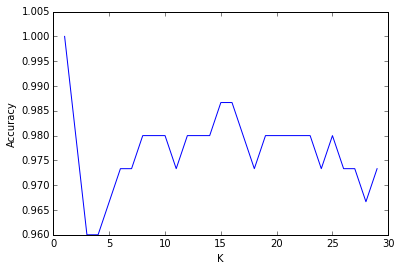

In [29]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [30]:
# K = 1, odd... Why is this odd?
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)
# In our next class we will be looking into this phenomenom, called "overfitting"
# by exploring what is known as the bias varaince tradeoff

1.0